In [120]:
import pandas as pd #data processing, CSV files I/O
import numpy as np  #linear algebra
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

%matplotlib inline
init_notebook_mode(connected=True)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import K nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression
#Import XG boost
from xgboost import XGBClassifier

In [119]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
df_apps = pd.read_csv("../input/datasetgps/Google-Playstore-Full.csv")
df_apps.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.



,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [90]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267052 non-null  object 
 3   Reviews          267051 non-null  object 
 4   Installs         267052 non-null  object 
 5   Size             267052 non-null  object 
 6   Price            267052 non-null  object 
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
 11  Unnamed: 11      18 non-null      object 
 12  Unnamed: 12      3 non-null       object 
 13  Unnamed: 13      2 non-null       object 
 14  Unnamed: 14      1 non-null       float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


In [91]:
df_apps.drop(df_apps.columns[df_apps.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [92]:
df_apps.Rating = pd.to_numeric(df_apps.Rating, errors = "coerce")

In [93]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267035 non-null  float64
 3   Reviews          267051 non-null  object 
 4   Installs         267052 non-null  object 
 5   Size             267052 non-null  object 
 6   Price            267052 non-null  object 
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
dtypes: float64(1), object(10)
memory usage: 22.4+ MB


In [94]:
df_apps.isnull().sum()

App Name            1
Category            1
Rating             17
Reviews             1
Installs            0
Size                0
Price               0
Content Rating      0
Last Updated        0
Minimum Version     1
Latest Version      3
dtype: int64

In [95]:
df_apps.dropna(inplace = True)

In [96]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267031 entries, 0 to 267051
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267031 non-null  object 
 1   Category         267031 non-null  object 
 2   Rating           267031 non-null  float64
 3   Reviews          267031 non-null  object 
 4   Installs         267031 non-null  object 
 5   Size             267031 non-null  object 
 6   Price            267031 non-null  object 
 7   Content Rating   267031 non-null  object 
 8   Last Updated     267031 non-null  object 
 9   Minimum Version  267031 non-null  object 
 10  Latest Version   267031 non-null  object 
dtypes: float64(1), object(10)
memory usage: 24.4+ MB


In [97]:
categories = list(df_apps["Category"].unique())
print(categories)

['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE', 'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE', 'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY', 'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO', 'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION', 'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN', 'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY', 'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL', 'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION', 'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER', 'MEDICAL', '6', 'TRAVEL']


In [98]:
a = df_apps.loc[df_apps["Category"] == "6"]
df_apps = df_apps.drop(int(a.index.values),axis=0)

In [99]:
df_apps["Price"] = df_apps["Price"].str.replace("$","")
df_apps["Price"] = df_apps["Price"].astype("float64")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [100]:
type = []
for i in df_apps.Price:
    if i == 0:
        type.append("Free")
    else:
        type.append("Paid")

In [101]:
df_apps['Type'] = type

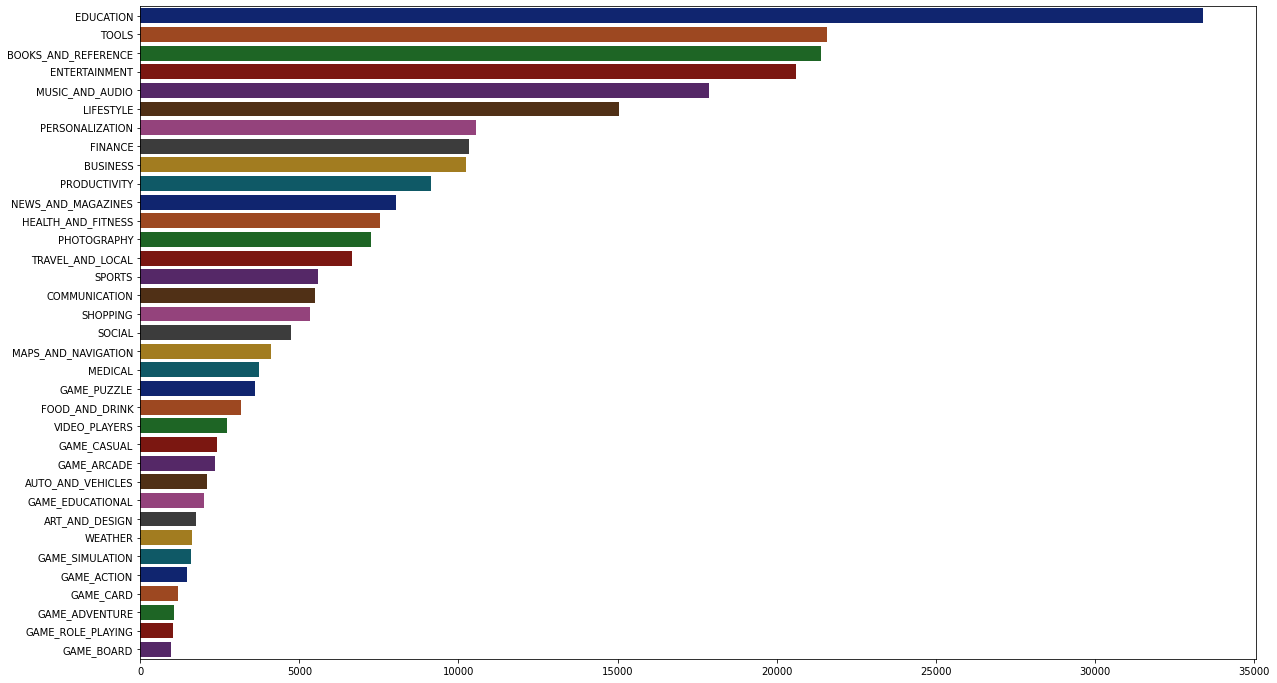

In [102]:
plt.figure(figsize=(20, 12))
genres = df_apps["Category"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="dark")

<AxesSubplot:>

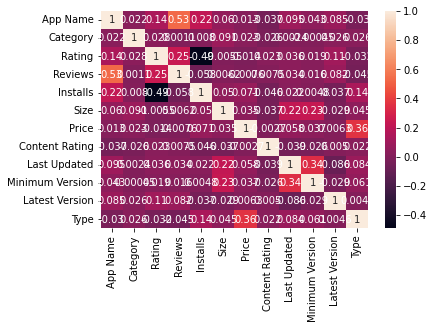

In [103]:
df_apps.dtypes
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

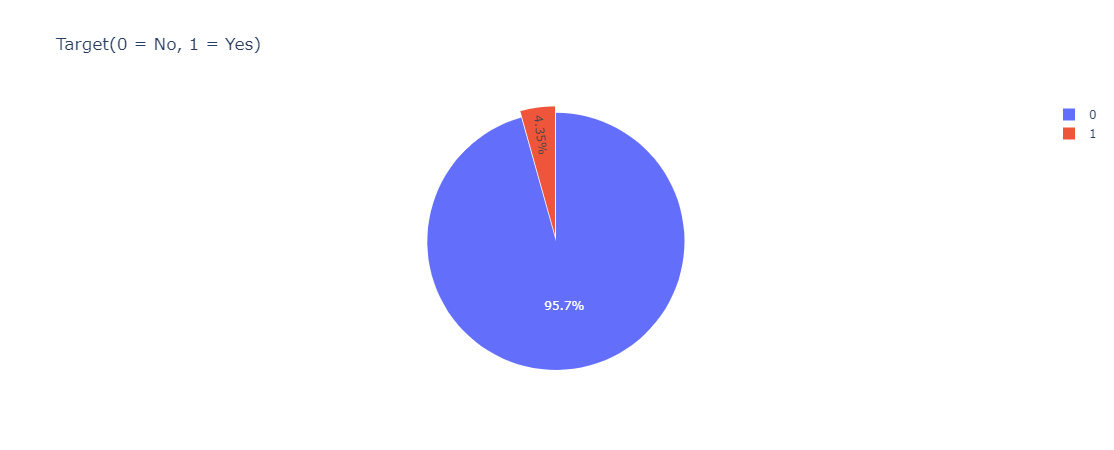

In [104]:
col = "Type"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

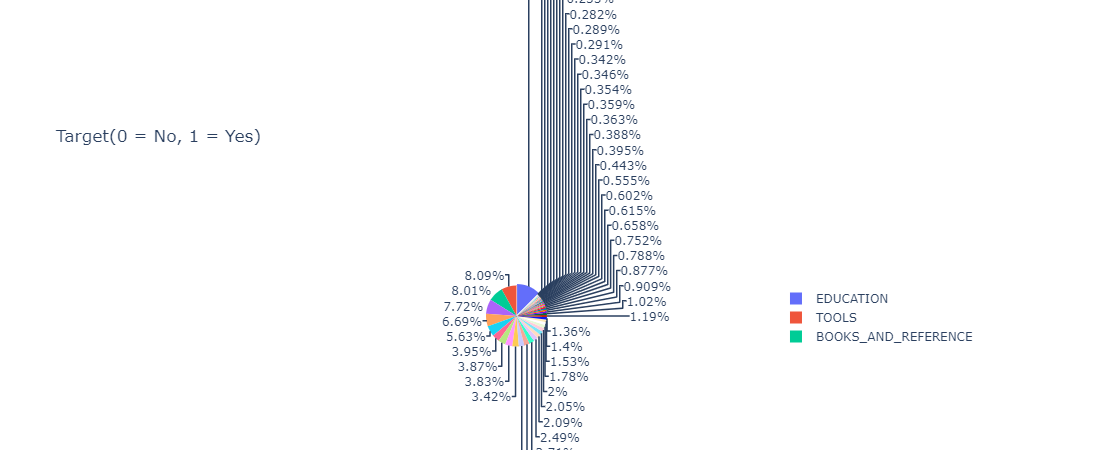

In [105]:
col = "Category"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [106]:
df_apps.drop("Size", axis = "columns", inplace = True)

In [108]:
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()

popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Reviews"] = popApps["Reviews"].astype("int64")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [110]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy.dtypes

App Name            object
Category             int64
Rating             float64
Reviews              int64
Installs             int64
Price              float64
Content Rating       int64
Last Updated        object
Minimum Version     object
Latest Version      object
Type                 int64
dtype: object

In [112]:
popAppsCopy = popAppsCopy.drop(["App Name","Last Updated","Minimum Version","Latest Version"],axis=1)
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)


testDf = testPop1.append(testPop0)
trainDf = popAppsCopy
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

In [114]:
model = GaussianNB()

model.fit(X_train,y_train)
predicted = model.predict(X_test)

In [115]:
print("Predicted: ",predicted[:20])
print("Actual:    ",np.array(y_test[:20]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predicted)*100)

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  77.6463963963964


In [117]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)


tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print("Predicted: ",predictions[:20])
print("Actual:    ",np.array(y_test[:20]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predictions)*100)

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  86.88063063063063


In [118]:
lg_model = LogisticRegression().fit(X_train,y_train)
lg_predict = lg_model.predict(X_test)

print("Predicted: ",lg_predict[:10])
print("Actual: ",np.array(y_test[:10]))
print("Accuracy Percentage: ",accuracy_score(y_true=y_test,y_pred = lg_predict)*100)

Predicted:  [1 1 0 1 0 0 0 1 1 0]
Actual:  [1 1 0 1 0 0 0 1 1 0]
Accuracy Percentage:  81.30630630630631


In [122]:
xgb_model = model = XGBClassifier().fit(X_train,y_train)
xgb_predict = xgb_model.predict(X_test)

print("Predicted: ",xgb_predict[:10])
print("Actual: ",np.array(y_test[:10]))
print("Accuracy Percentage: ",accuracy_score(y_true=y_test,y_pred = xgb_predict)*100)

Predicted:  [1 1 0 1 0 0 0 1 1 0]
Actual:  [1 1 0 1 0 0 0 1 1 0]
Accuracy Percentage:  87.33108108108108
